Description

In [ ]:
# Lenti Lines transfected with either plasmid or 
# measured at multiple dates post DPT 

In [ ]:
x=4


## Import Functions and set directories ##

In [1]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
datadir = Path(Path('../../datadir_srk.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/f_lentilines/'

In [3]:
display(datadir)

WindowsPath('C:/Users/ChemeGrad2020/OneDrive - Massachusetts Institute of Technology/Documents - GallowayLab')

## Import Data ##

In [2]:
#Check to make sure that datadir in "Set Directories" corresponds to the local path on your computer 

In [5]:
# Import Data 1
# Import the gated data 
folder = '20240504flow_lentilines_3DPT'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_gated_mGL' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
#rd.plot.plot_well_metadata(yaml_path)
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data1['bioreplicate'] = folder 


In [6]:
# Import Data 2
# Import the gated data 
folder = '20240507flow_lentilines_6DPT'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_gated' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
#rd.plot.plot_well_metadata(yaml_path)
data2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data2['bioreplicate'] = folder

In [7]:
# Import Data 3
# Import the gated data 
folder = '20240510flow_293T_lentiline_9DPT_real'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_gated' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
#rd.plot.plot_well_metadata(yaml_path)
data3 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data3['bioreplicate'] = folder


Concatenate Data, Gate on iRFP670, add conditions

In [8]:
data = pd.concat( [data1, data2, data3], ignore_index=True)
display(data.head())
#Also make the data without the DNA condition bc it did nothing (see the plots wihtout DPT listed) and the ignore reporter 
data = data[ data['reporter_ZF']!='ignore']
data = data[ data['Cre']!='DNA_0.1xCre']

,DPT,reporter_ZF,Cre,Cre_comarker,well,population,FSC-A,FSC-H,FSC-W,SSC-A,...,TagBFP-H,TagBFP-W,Janelia Fluor 549-A,Janelia Fluor 549-H,Janelia Fluor 549-W,mCherry-A,mCherry-H,mCherry-W,Time,bioreplicate
0,3DPT,203bp-lenti_No-div_ZF37(lenti),noCre,none,A10,"mGL-A, mCherry-A subset",514340,274730,120,297094,...,68,0,1122.0,781.0,61,274,211,26,0.142402,20240504flow_lentilines_3DPT
1,3DPT,203bp-lenti_No-div_ZF37(lenti),noCre,none,A10,"mGL-A, mCherry-A subset",412530,240863,118,181328,...,82,0,1320.0,917.0,79,286,328,32,0.146530,20240504flow_lentilines_3DPT
2,3DPT,203bp-lenti_No-div_ZF37(lenti),noCre,none,A10,"mGL-A, mCherry-A subset",461135,256458,122,183754,...,82,0,1850.0,1392.0,65,531,348,42,0.249720,20240504flow_lentilines_3DPT
3,3DPT,203bp-lenti_No-div_ZF37(lenti),noCre,none,A10,"mGL-A, mCherry-A subset",417053,260885,116,159256,...,83,0,1248.0,1070.0,54,286,202,31,0.320921,20240504flow_lentilines_3DPT
4,3DPT,203bp-lenti_No-div_ZF37(lenti),noCre,none,A10,"mGL-A, mCherry-A subset",271764,166163,110,111813,...,41,0,238.0,204.0,28,148,88,0,0.328145,20240504flow_lentilines_3DPT


In [9]:
data = data[ data['mCherry-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['TagBFP-A'] >0]
data = data[ data['iRFP670-A'] >0]
#data['log10 mGL-A'] = np.log10(data['mGL-A'])

data['cond'] = data['reporter_ZF'] +'_' + data['Cre']

iRFP670_gate = 20000 
mGL_gate = 1500
mCherry_gate = 200
TagBFP_gate = 200

rept_ZFs= pd.unique( data['reporter_ZF'])
display(rept_ZFs)

rept_shortname = { '203bp-lenti_No-div_ZF37(lenti)': '203bp-noDIV_37',
       '155bp-lenti_div-iRFP670_ZF37(lenti)': '155bp-DIV_37',
       '203bp-lenti_div-iRFP670_ZF37(lenti)': '203p-DIV_37',
       '203bp-lenti_div-iRFP670_ZF43(lenti)': '203bp-DIV_43',
}

DPT_short = { '3DPT': '3', '6DPT': '6', '9DPT':'9'}
data['DPT_short'] = data['DPT'].map(DPT_short)

Cres= pd.unique( data['Cre'])
display(Cres)

Cre_palette_ZF37 = {'noCre':'darksalmon', 'DNA_0.1xCre':'grey', 'modRNA_100ngxCre':'red'}
Cre_palette_ZF43 = {'noCre':'deepskyblue', 'DNA_0.1xCre':'grey', 'modRNA_100ngxCre':'blue'}


array(['203bp-lenti_No-div_ZF37(lenti)',
       '155bp-lenti_div-iRFP670_ZF37(lenti)',
       '203bp-lenti_div-iRFP670_ZF37(lenti)',
       '203bp-lenti_div-iRFP670_ZF43(lenti)'], dtype=object)

array(['noCre', 'modRNA_100ngxCre'], dtype=object)

## Histograms Ungated and Gated ##

**Ungated joint plots**

In [ ]:
#set the hue, hue_order, palette 
hue = 'Cre'
hue_order = None
hueorder = None
palette = {'noCre': 'darksalmon', 'DNA_0.1xCre':'orange', 'modRNA_100ngxCre':'red'}

# Histogram conditions 
xsize = 4
ysize = 1.8
fontsize = 16.5
xlim = [1e2, 3e5]
parameters = pd.array(['mGL-A'])

## Ungated (whichever gate was on the original data)
#Iterate through the different conditions 
rept_ZFs= pd.unique( data['reporter_ZF'])
DPTs = pd.unique( data['DPT'])
for rept in rept_ZFs: 
    if rept != 'ignore':
        for DPT in DPTs:
            xlim = [1e2, 3e5]
            data_now = data[ data['reporter_ZF']== rept]
            data_now = data_now[ data_now['DPT']== DPT]
            
            print("number of cells=",data_now['FSC-A'].count())
            plottitle = rept_shortname[rept] + '_mGLgate_mCh' + DPT
            g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
                                    plottitle=plottitle,
                                    palette=palette, alpha=0, type = ['contour'], hline=mCherry_gate)
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
            
            plottitle = rept_shortname[rept] + '_mGLgate_BFP' + DPT
            g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
                                    plottitle=plottitle, 
                                    palette=palette, alpha=0, type = ['contour'], hline=TagBFP_gate)
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

            plottitle = rept_shortname[rept] + '_mGLga_mGL_H' + DPT
            parameters = pd.array(['mGL-A'])
            g = plt.figure( figsize=[xsize, ysize])
            g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                                alpha=0.1,fontsize=fontsize, 
                                legendtitle='Condition', xlim=xlim)
            g = g.get_figure()
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
            g = plt.figure( figsize=[xsize, ysize])
            
            xlim = [1e0, 1e6]
            plottitle = rept_shortname[rept] + '_mGLga_iRFP_H' + DPT
            parameters = pd.array(['iRFP670-A'])
            g = plt.figure( figsize=[xsize, ysize])
            g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                                alpha=0.1,fontsize=fontsize, 
                                legendtitle='Condition', xlim=xlim)
            g = g.get_figure()
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

### Histograms Gated mCherry

In [ ]:
# Import negative data
# Import the gated data 
folder = '20240510flow_293T_lentiline_9DPT_real'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'data_neg' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'data_neg.yaml' #Assign yaml paths 
data_neg = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data_neg = data_neg[ data_neg['mGL-A']>0]
#reference, same laser settings 

# Also available in
# folder = '20240510flow_293T_lentiline_3DPT'
# folder = '20240510flow_293T_lentiline_6DPT'

unstained should show


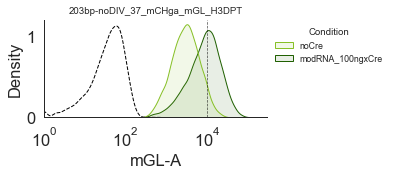

unstained should show


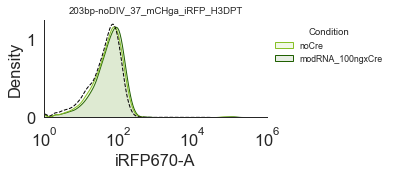

unstained should show


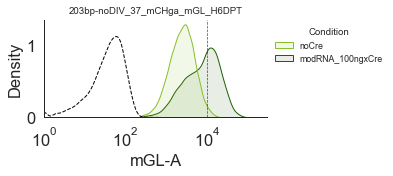

unstained should show


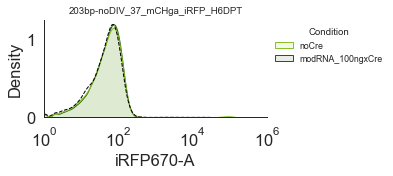

unstained should show


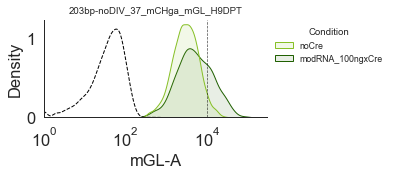

unstained should show


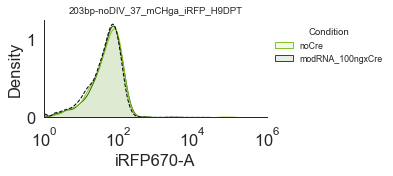

unstained should show


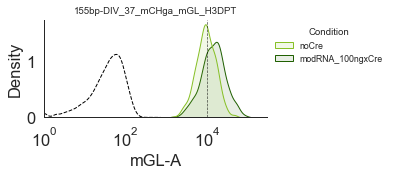

unstained should show


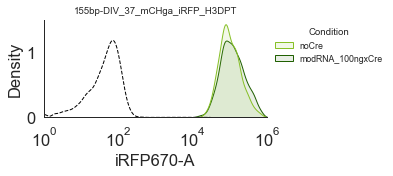

unstained should show


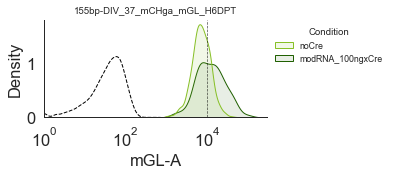

unstained should show


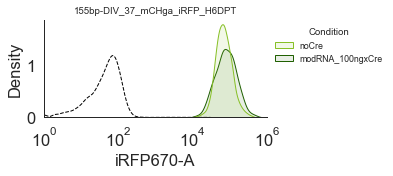

unstained should show


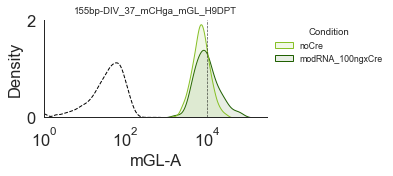

unstained should show


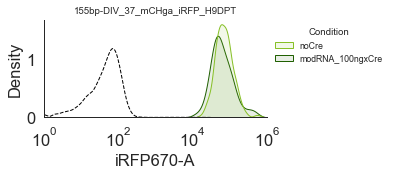

unstained should show


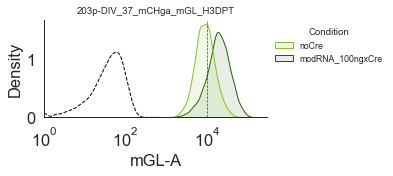

unstained should show


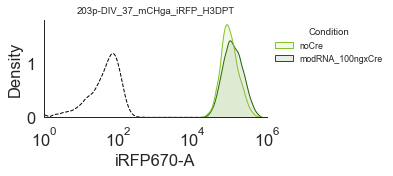

unstained should show


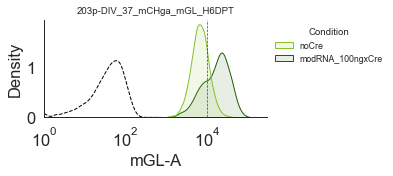

unstained should show


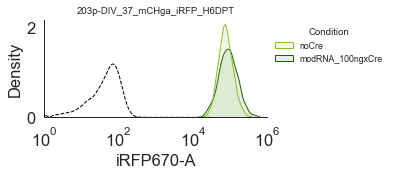

unstained should show


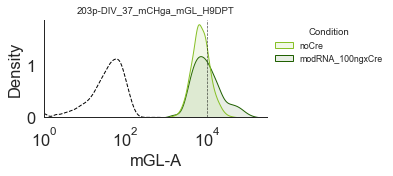

unstained should show


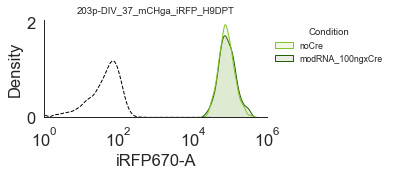

In [ ]:



#set the hue, hue_order, palette 
hue = 'Cre' 
hue_order = None
hueorder = None
palette = {'noCre': '#C3DB9A', 
               'DNA_0.1xCre':'gray', 
               'modRNA_100ngxCre':'#69B645'}
palette = {'noCre':"#87C027",       #'#C3DB9A', 
               'DNA_0.1xCre':'red', 
               'modRNA_100ngxCre': "#206002"}   # '#69B645'}

# Histogram conditions 
xsize = 4
ysize = 1.8
fontsize = 16.5
xlim = [1.5e1, 3e5]
parameters = pd.array(['mGL-A'])
DPTs = pd.unique( data['DPT'])

## Gated Mcherry 
#Iterate through the different conditions 
rept_ZFs= pd.array(['203bp-lenti_No-div_ZF37(lenti)',
       '155bp-lenti_div-iRFP670_ZF37(lenti)',
       '203bp-lenti_div-iRFP670_ZF37(lenti)'
       ], dtype=object)
# rept_ZFs= pd.array(['203bp-lenti_No-div_ZF37(lenti)'
#        ], dtype=object)

# %store -r data_unstained_20240304flow_exp20240301_p3_BioC_unstained
# data_neg = data_unstained_20240304flow_exp20240301_p3_BioC_unstained #unstained at the same laser settings 

for rept in rept_ZFs: 
    for DPT in DPTs:
        if rept != 'ignore':
            
            
            xlim = [1e2, 3e5]
            data_now = data[ data['reporter_ZF']== rept]
            data_now = data_now[ data_now['DPT']==DPT]

            hold = data_now
            data_now = data_now[ data_now['mCherry-A']>mCherry_gate]
            # data_neg = hold[ hold['mCherry-A']<mCherry_gate]
            # data_neg = data_neg[data_neg['Cre']=='noCre']
            
            # plottitle = rept_shortname[rept] + '_mCHgate_mCh' + DPT
            # g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
            #                         plottitle=plottitle, 
            #                         palette=palette, alpha=0, type = ['contour'], hline=mCherry_gate)
            # g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
            
            # plottitle = rept_shortname[rept] + '_mCHgate_BFP' + DPT
            # g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
            #                         plottitle=plottitle, 
            #                         palette=palette, alpha=0, type = ['contour'], hline=TagBFP_gate)
            # g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
            
            xlim = [1e0, 3e5]
            parameters = pd.array(['mGL-A'])
            plottitle = rept_shortname[rept] + '_mCHga_mGL_H' + DPT
            g = plt.figure( figsize=[xsize, ysize])
            g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                                alpha=0.1,fontsize=fontsize,data_neg=data_neg, line=10000,
                                legendtitle='Condition', xlim=xlim)
            g = g.get_figure()
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

            xlim = [1e0, 1e6]
            parameters = pd.array(['iRFP670-A'])
            plottitle = rept_shortname[rept] + '_mCHga_iRFP_H' + DPT
            g = plt.figure( figsize=[xsize, ysize])
            g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                                alpha=0.1,fontsize=fontsize, data_neg=data_neg,
                                legendtitle='Condition', xlim=xlim)
            g = g.get_figure()
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

**Gated tagBFP**

In [ ]:
#set the hue, hue_order, palette 
hue = 'Cre' 
hue_order = None
hueorder = None
palette = 'bright'

# Histogram conditions 
xsize = 4
ysize = 1.8
fontsize = 16.5
xlim = [1e2, 3e5]
parameters = pd.array(['mGL-A'])


## Gated TagBFP
#Iterate through the different conditions 
rept_ZFs= pd.array(['203bp-lenti_div-iRFP670_ZF43(lenti)'], dtype=object)
for rept in rept_ZFs: 
    if rept != 'ignore':
        data_now = data[ data['reporter_ZF']== rept]
        data_now = data_now[ data_now['TagBFP-A']>TagBFP_gate]
        
        plottitle = rept_shortname[rept] + '_mCHgate_mCh'
        g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
                                plottitle=plottitle, 
                                palette=palette, alpha=0, type = ['contour'], hline=mCherry_gate)
        g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
        
        plottitle = rept_shortname[rept] + '_mCHgate_BFP'
        g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
                                plottitle=plottitle, 
                                palette=palette, alpha=0, type = ['contour'], hline=TagBFP_gate)
        g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

        plottitle = rept_shortname[rept] + '_mCHga_mGL_H'
        g = plt.figure( figsize=[xsize, ysize])
        g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                            alpha=0.1,fontsize=fontsize,
                            legendtitle='Condition', xlim=xlim)
        g = g.get_figure()
        g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

## Summary Plots ##

### Calculate Summary Stats**

In [ ]:
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['DPT', 'DPT_short', 'reporter_ZF', 'Cre', 'bioreplicate','well'] #how to filter results, columns -- 
#for lentilines each "well" labeled as such in the file was actually a separate passaging experiment and hence different bioreplicate
#well is just a remnant of data labeling, but it was biological replicate
x = ['mGL-A', 'TagBFP-A','mCherry-A','iRFP670-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate

#ungated
df = data #choose dataframe
s = calc_stats(df,by,x,stat) #calculate statistics 
s.to_excel('Fig3_S12B-D_S13A-D_lines_mGL_670gate.xlsx',index=False)

#mCherry_gated
df = data[data['mCherry-A']>mCherry_gate] #choose dataframe
s_mCherry_gate = calc_stats(df,by,x,stat) #calculate statistics 
s_mCherry_gate.to_excel('Fig3_S12B-D_S13A-D_lines_mGL_670_mCh_gate.xlsx',index=False)

### Plot Summary Plots Ungated and mChGated**

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=5.292e-05 stat=-1.826e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.459e-07 stat=-8.005e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.807e-03 stat=-7.369e+00


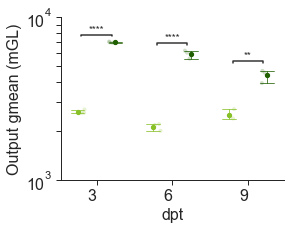

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=6.251e-05 stat=-1.751e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.822e-07 stat=-7.573e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.779e-03 stat=-7.400e+00


<Figure size 432x288 with 0 Axes>

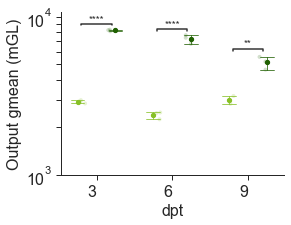

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=2.823e-03 stat=-6.541e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=3.307e-07 stat=-6.524e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=2.568e-02 stat=-3.466e+00


<Figure size 432x288 with 0 Axes>

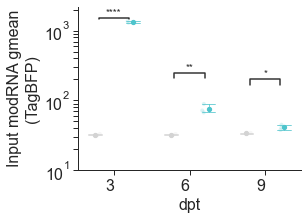

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=3.840e-03 stat=-6.018e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=8.308e-07 stat=-5.181e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=8.044e-02 stat=-2.328e+00


<Figure size 432x288 with 0 Axes>

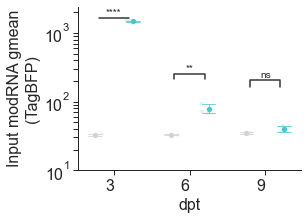

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=2.063e-04 stat=-1.293e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=3.354e-04 stat=-1.142e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.347e-02 stat=-4.220e+00


<Figure size 432x288 with 0 Axes>

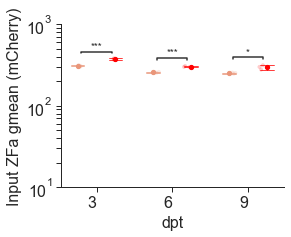

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=2.309e-04 stat=-1.257e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=8.634e-04 stat=-8.947e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=4.191e-02 stat=-2.951e+00


<Figure size 432x288 with 0 Axes>

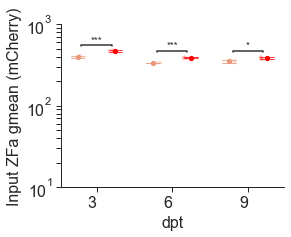

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=7.211e-02 stat=-2.428e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=6.236e-04 stat=-9.735e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.432e-02 stat=-4.145e+00


<Figure size 432x288 with 0 Axes>

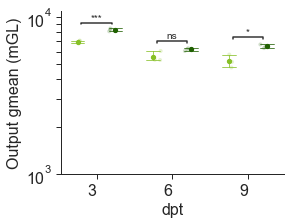

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=5.572e-03 stat=-5.432e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=2.129e-03 stat=-7.055e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=5.223e-02 stat=-2.734e+00


<Figure size 432x288 with 0 Axes>

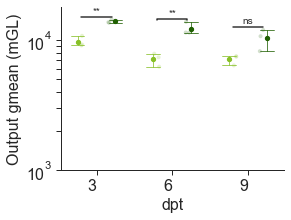

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=3.338e-04 stat=-1.143e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.303e-05 stat=-2.598e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=7.126e-01 stat=3.956e-01


<Figure size 432x288 with 0 Axes>

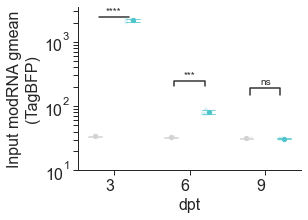

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=3.968e-03 stat=-5.964e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=7.409e-05 stat=-1.677e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.311e-01 stat=-1.894e+00


<Figure size 432x288 with 0 Axes>

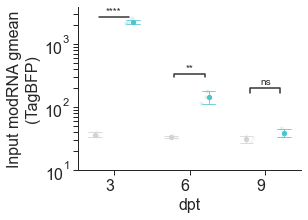

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=7.857e-02 stat=-2.349e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.230e-02 stat=-4.335e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=6.333e-02 stat=-2.550e+00


<Figure size 432x288 with 0 Axes>

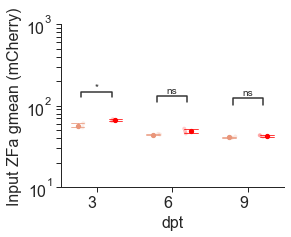

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=5.254e-02 stat=-2.728e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.882e-01 stat=-1.585e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.716e-01 stat=-1.663e+00


<Figure size 432x288 with 0 Axes>

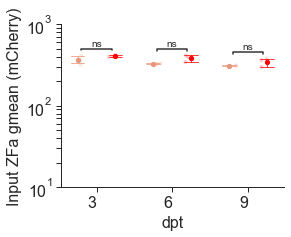

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=4.112e-05 stat=-1.946e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=4.571e-05 stat=-1.895e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.202e-02 stat=-4.364e+00


<Figure size 432x288 with 0 Axes>

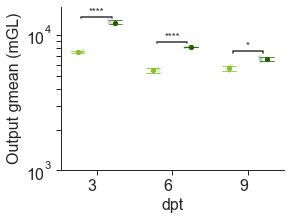

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=1.403e-04 stat=-1.426e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=2.810e-05 stat=-2.142e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=8.370e-02 stat=-2.292e+00


<Figure size 432x288 with 0 Axes>

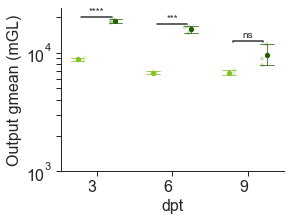

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=1.235e-04 stat=-1.473e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=3.071e-05 stat=-2.094e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=6.424e-01 stat=-5.015e-01


<Figure size 432x288 with 0 Axes>

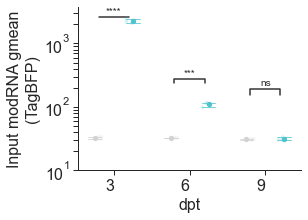

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=5.514e-05 stat=-1.807e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.808e-04 stat=-1.337e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=3.525e-01 stat=-1.051e+00


<Figure size 432x288 with 0 Axes>

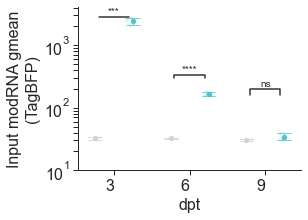

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=9.303e-01 stat=9.305e-02
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=6.163e-04 stat=-9.764e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.054e-04 stat=1.534e+01


<Figure size 432x288 with 0 Axes>

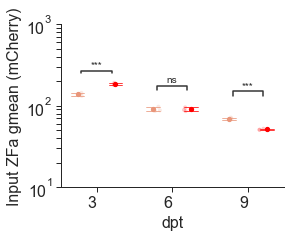

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=2.552e-04 stat=-1.225e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.227e-03 stat=-8.161e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.997e-02 stat=-3.749e+00


<Figure size 432x288 with 0 Axes>

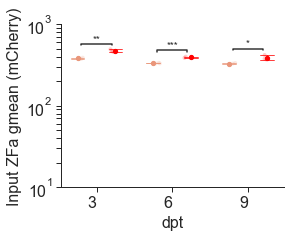

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=1.096e-03 stat=-8.405e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=5.601e-03 stat=-5.424e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.060e-02 stat=-4.527e+00


<Figure size 432x288 with 0 Axes>

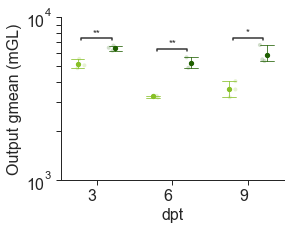

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=1.072e-01 stat=-2.278e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=nan stat=nan
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=nan stat=nan


c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

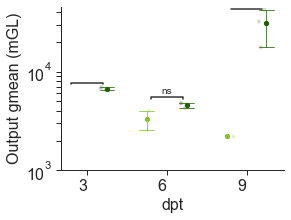

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=1.231e-01 stat=1.949e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.728e-03 stat=-7.457e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.496e-02 stat=4.091e+00


<Figure size 432x288 with 0 Axes>

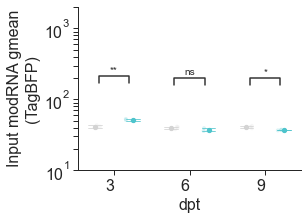

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=4.501e-01 stat=8.662e-01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=nan stat=nan
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=nan stat=nan


c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

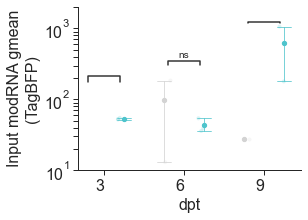

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=8.036e-05 stat=-1.643e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=6.887e-04 stat=-9.488e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=8.329e-01 stat=2.251e-01


<Figure size 432x288 with 0 Axes>

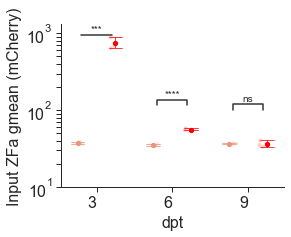

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=1.273e-02 stat=-5.356e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=nan stat=nan
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=nan stat=nan


c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

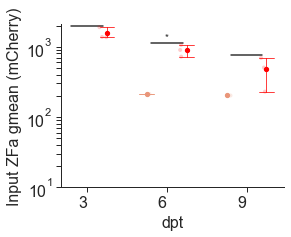

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot summary plot for each reporter and it's correspond mRNA color
rept_ZFs= pd.unique( data['reporter_ZF'])
hue = 'Cre' 
hue_order = pd.array(['noCre','modRNA_100ngxCre'])
palette_mGL = {'noCre':"#87C027",       #'#C3DB9A', 
               'DNA_0.1xCre':'red', 
               'modRNA_100ngxCre': "#206002"}   # '#69B645'}
palette_mCherry = {'noCre': 'darksalmon', 
               'DNA_0.1xCre':'orange', 
               'modRNA_100ngxCre':'red'}
palette_tagBFP_Cre = { 'noCre': 'lightgray', 
               'DNA_0.1xCre':'gray', 
               'modRNA_100ngxCre':'#4EC4CC'}

palettes = { 'mGL-A_gmean': palette_mGL,
        'TagBFP-A_gmean':  palette_tagBFP_Cre, 
        'mCherry-A_gmean': palette_mCherry}

x = 'DPT_short'
xlabel = 'DPT'
order = pd.array(['3', '6','9']) 

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean','TagBFP-A_gmean','mCherry-A_gmean'])
#set plotting parameters 
yscale= 'log'
ylims = { 'mGL-A_gmean': [1e3, 1e4],
        'TagBFP-A_gmean':  [1e1, 2e3], 
        'mCherry-A_gmean': [1e1, 1e3]}

ylabels = { 'mGL-A_gmean': 'Output gmean (mGL)',
        'TagBFP-A_gmean':  'Input modRNA gmean\n(TagBFP)', 
        'mCherry-A_gmean': 'Input ZFa gmean (mCherry)'}


#Set p-value significance comparisons 
pairs = [ [('3','noCre'), ('3','modRNA_100ngxCre')],
         [('6','noCre'), ('6','modRNA_100ngxCre')],
         [('9','noCre'), ('9','modRNA_100ngxCre')],
         #[('3DPT','noCre'), ('6DPT','noCre')],
         #[('6DPT','noCre'), ('9DPT','noCre')],
         #[('3DPT','modRNA_100ngxCre'), ('6DPT','modRNA_100ngxCre')],
         #[('6DPT','modRNA_100ngxCre'), ('9DPT','modRNA_100ngxCre')]
]

xsize =4  ; ysize = 3
fontsize = 16

for rept in rept_ZFs:
       display(rept)
       for stat in stats_plot:
              display(stat)
              y = stat # set the stat to plot
              palette = palettes[stat]
              yscale = 'log'
              ylabel = ylabels[stat]
              ylim = ylims[stat]
              
              data_now = s[s['reporter_ZF']==rept]
              plottitle = rept_shortname[rept]+ '_' + y + '_NOgate'
              display(plottitle)
              g = plt.figure(figsize=(xsize,ysize))
              g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                            ylim=ylim, fontsize=fontsize, ylabel=ylabel, legend=False,
                            x_rot=0, palette = palette, order=order, hue_order=hue_order, plottitle='', 
                            xlabel='dpt')
              g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

              data_now = s_mCherry_gate[s_mCherry_gate['reporter_ZF']==rept]
              plottitle = rept_shortname[rept]+ '_' + y + '_mChgate'
              display(plottitle)
              g = plt.figure(figsize=(xsize,ysize))
              g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                            ylim=ylim, fontsize=fontsize, ylabel=ylabel, legend=False,
                            x_rot=0, palette = palette, order=order, hue_order=hue_order, plottitle='', 
                            xlabel='dpt')
              g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Fold Change Calculation - mCherry gated

In [18]:
# Summary stats calculation from earlier in the code

# #Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
# by = ['DPT', 'DPT_short', 'reporter_ZF', 'Cre', 'bioreplicate','well'] #how to filter results, columns 
# x = ['mGL-A', 'TagBFP-A','mCherry-A','iRFP670-A'] #which parameter to calculate results on
# stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate

# #ungated
# df = data #choose dataframe
# s = calc_stats(df,by,x,stat) #calculate statistics 

# #mCherry_gated
# df = data[data['mCherry-A']>mCherry_gate] #choose dataframe
# s_mCherry_gate = calc_stats(df,by,x,stat) #calculate statistics 

In [19]:
s_mCherry_gate['DPT_biorep_well'] = s_mCherry_gate['DPT'] + s_mCherry_gate['reporter_ZF'] + s_mCherry_gate['bioreplicate'] 
 
s_mCherry_gate_foldchange = s_mCherry_gate[ s_mCherry_gate['reporter_ZF']!= '203bp-lenti_div-iRFP670_ZF43(lenti)' ]
conds = pd.unique( s_mCherry_gate_foldchange['DPT_biorep_well'])

s_noCre_map  = {'test':'test'}

for cond in conds:
    display(cond)
    data_now = s_mCherry_gate[ s_mCherry_gate['DPT_biorep_well'] == cond]
    #display(data_now) 
    mGL_noCre = data_now[ data_now['Cre'] == 'noCre']['mGL-A_gmean'].iloc[0]
    s_noCre_map[cond] = mGL_noCre

s_mCherry_gate['noCre'] = s_mCherry_gate['DPT_biorep_well'].map(s_noCre_map)
s_mCherry_gate['Fold Change'] = s_mCherry_gate['mGL-A_gmean'] / s_mCherry_gate['noCre']


'3DPT155bp-lenti_div-iRFP670_ZF37(lenti)20240504flow_lentilines_3DPT'

'3DPT203bp-lenti_No-div_ZF37(lenti)20240504flow_lentilines_3DPT'

'3DPT203bp-lenti_div-iRFP670_ZF37(lenti)20240504flow_lentilines_3DPT'

'6DPT155bp-lenti_div-iRFP670_ZF37(lenti)20240507flow_lentilines_6DPT'

'6DPT203bp-lenti_No-div_ZF37(lenti)20240507flow_lentilines_6DPT'

'6DPT203bp-lenti_div-iRFP670_ZF37(lenti)20240507flow_lentilines_6DPT'

'9DPT155bp-lenti_div-iRFP670_ZF37(lenti)20240510flow_293T_lentiline_9DPT_real'

'9DPT203bp-lenti_No-div_ZF37(lenti)20240510flow_293T_lentiline_9DPT_real'

'9DPT203bp-lenti_div-iRFP670_ZF37(lenti)20240510flow_293T_lentiline_9DPT_real'

## Plot Fold Change

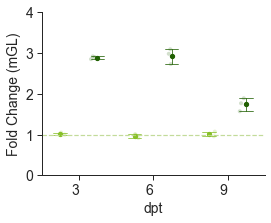

<Figure size 432x288 with 0 Axes>

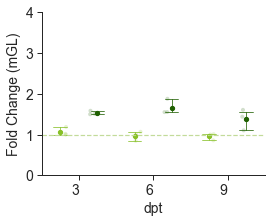

<Figure size 432x288 with 0 Axes>

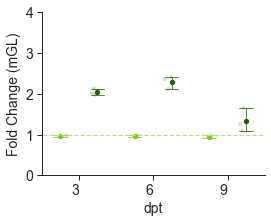

<Figure size 432x288 with 0 Axes>

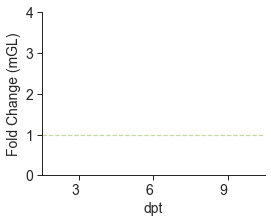

<Figure size 432x288 with 0 Axes>

In [25]:
#Plot summary plot for each reporter and it's correspond mRNA color
rept_ZFs= pd.unique( data['reporter_ZF'])
hue = 'Cre' 
hue_order = pd.array(['noCre','modRNA_100ngxCre'])
# Use same palette as summary plots defined earlier 
# palette_mGL = {'noCre': '#C3DB9A', 
#                'DNA_0.1xCre':'gray', 
#                'modRNA_100ngxCre':'#69B645'}
# palette_mCherry = {'noCre': 'darksalmon', 
#                'DNA_0.1xCre':'orange', 
#                'modRNA_100ngxCre':'red'}
# palette_tagBFP_Cre = { 'noCre': 'lightgray', 
#                'DNA_0.1xCre':'gray', 
#                'modRNA_100ngxCre':'#4EC4CC'}

palettes = { 'mGL-A_gmean': palette_mGL,
        'TagBFP-A_gmean':  palette_tagBFP_Cre, 
        'mCherry-A_gmean': palette_mCherry, 
        'Fold Change': palette_mGL}

x = 'DPT_short'
xlabel = 'DPT'
order = pd.array(['3', '6','9']) 

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean','TagBFP-A_gmean','mCherry-A_gmean'])
#set plotting parameters 
yscale= 'linear'
ylims = { 'mGL-A_gmean': [1e3, 1e4],
        'TagBFP-A_gmean':  [1e1, 2e3], 
        'mCherry-A_gmean': [1e1, 1e3], 
        'Fold Change': [0,4]}


#Set p-value significance comparisons 
pairs = [
]

xsize =4  ; ysize = 3
fontsize = 14

y = 'Fold Change'
for rept in rept_ZFs:
    data_now = s_mCherry_gate[s_mCherry_gate['reporter_ZF']==rept]
    plottitle = rept_shortname[rept]+ '_' + y + '_mChgate'
    palette = palettes[y]
    ylim = ylims[y]
    g = plt.figure(figsize=(xsize,ysize))
    plt.axhline(y=1, ls='--', color='#C3DB9A')
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                ylim=ylim, fontsize=fontsize, legend=False,ylabel = 'Fold Change (mGL)',
                x_rot=0, palette = palette, order=order, hue_order=hue_order, plottitle='', 
                xlabel='dpt', scientific=False)
    g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

# Fraction mGL>10000

In [ ]:
# Count the total number of cells in each 'cond' and 'DPT' group
by = ['reporter_ZF', 'Cre','DPT']
df = data[data['mCherry-A']>mCherry_gate] #choose dataframe
total_counts = df.groupby(by).size()

# Count the number of cells with 'mGL-A' > 10000 in each 'cond' and 'DPT' group
counts_above_10000 = df[df['mGL-A'] > 10000].groupby(by).size()

# Calculate the fraction
fraction = (counts_above_10000 / total_counts).fillna(0).reset_index(name='fraction')

display(fraction)